
### Kavyashree Devadiga | 117398045
## ENPM809T Homework 1
<p>

Calculate and Plot Moving Average for IMU Data
For a review of the moving average, [reference](https://www.youtube.com/watch?v=KBZOgRoiMXI)
</p>

>> Import Dependencies

In [7]:
import numpy as np
import matplotlib.pyplot as plt

>> Read Data
<br>
**1. Load the ADXL327 3-axis accelerometer data into Python/NumPy.**

In [5]:
imudata = np.loadtxt("imudata.txt", usecols=4, dtype=float)
#np.loadtxt("imudata.txt", dtype=float)
print('Data Size: ',len(imudata),'\tExample Values: ',imudata[0:4],'\tType of array: ',type(imudata))

Data Size:  371 	Example Values:  [ 6.  3. 10.  9.] 	Type of array:  <class 'numpy.ndarray'>


**2. Plot the raw data for the 5th column of the file, corresponding to the pitch angle of the accelerometer as configured with the vehicle.**
</br>
Label the axes then add a title and legend to the plot.

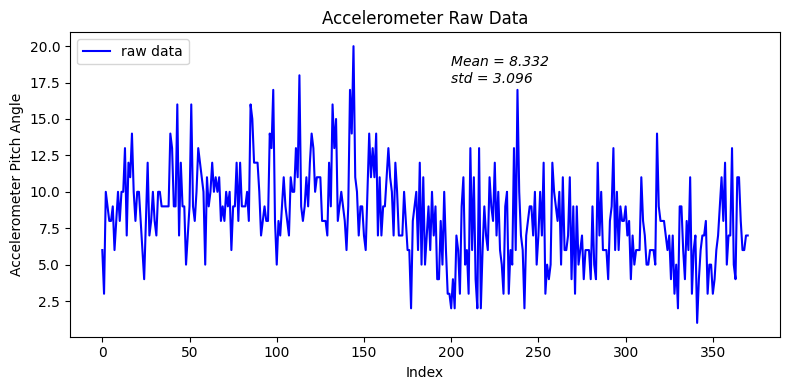

In [59]:
plt.plot(range(len(imudata)),imudata,  "-b", label="raw data")
plt.legend(loc="upper left")
plt.ylabel('Accelerometer Pitch Angle')
plt.xlabel('Index')
plt.title('Accelerometer Raw Data')
plt.rcParams['figure.figsize'] = [8,4]
ave_std_info = "Mean = "+str(round(np.mean(imudata),3))+"\nstd = "+str(round(np.std(imudata),3))
plt.text(200, 17.5, ave_std_info, style='italic')
plt.show()

**4. Write your own function to calculate a moving average of the raw accelerometer data.**

In [32]:
def MovingAverage(window_size,raw_data):
    try:
        print('Window Size: ',window_size)
        averaged_data = []
        for i in range(np.size(raw_data) - (window_size - 1)):
            averaged_data.append(np.mean(raw_data[i : i + window_size]))
        return averaged_data
    except Exception as ex:
        print(ex)

>> Function should be evaluated for 2-, 4-, 8-, 16-, and 64-, and 128-pt moving averages

In [33]:
mv_points = [2,4,8,16,64,128]

**5. Plot the averaged data on top of the raw data on the same plot.**
</br>
Calculate the mean and standard deviation of the averaged data and include this information
on the plot.

>> Evaluating and plotting moving averages iteratively for all points in above array

Window Size:  2


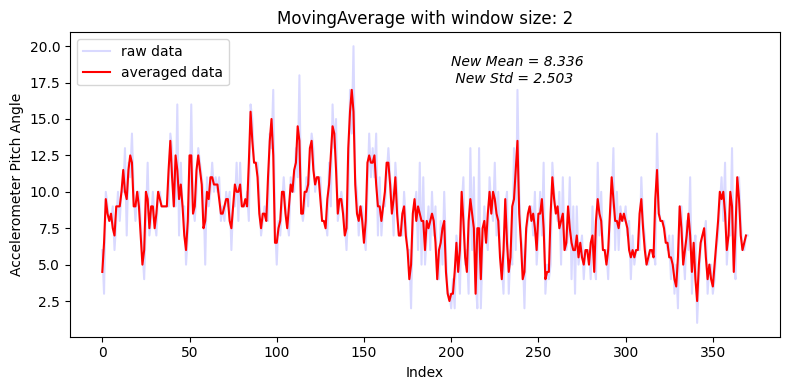

Window Size:  4


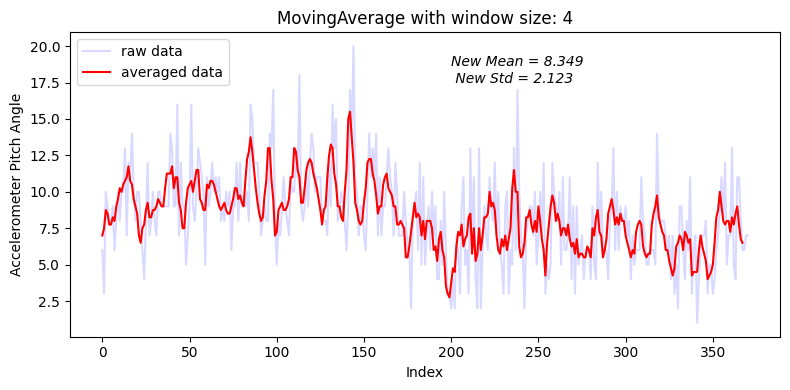

Window Size:  8


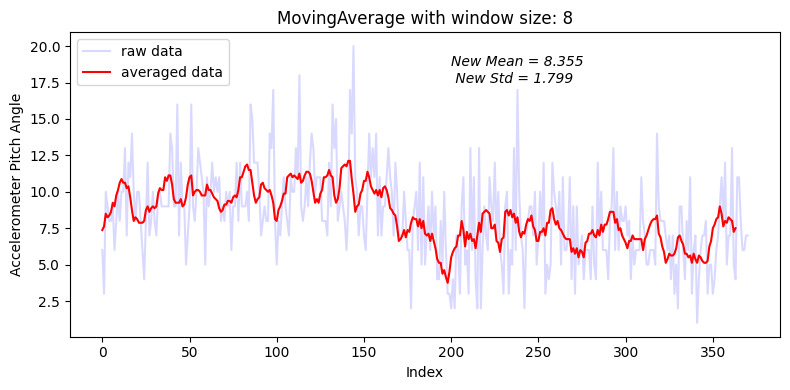

Window Size:  16


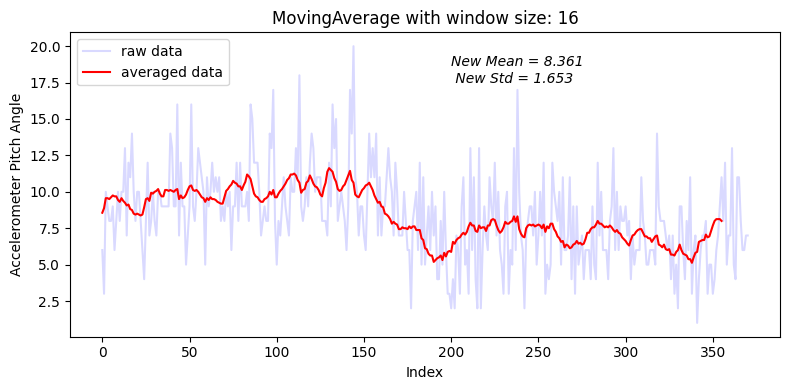

Window Size:  64


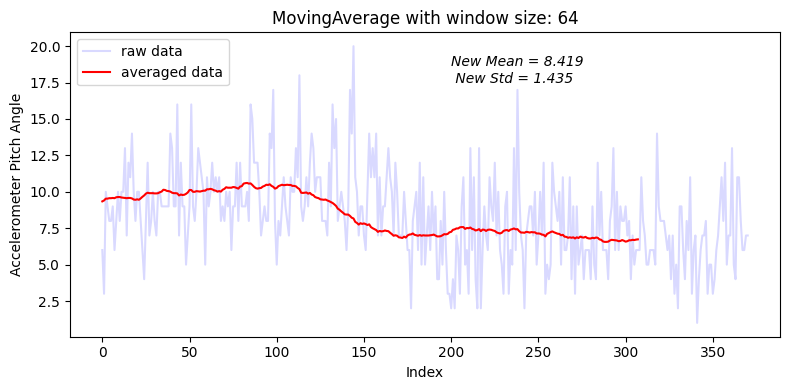

Window Size:  128


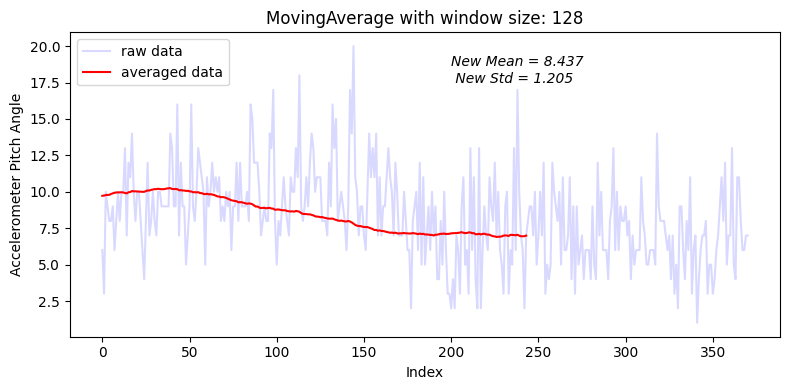

In [60]:
for pt in range(len(mv_points)):
    averaged_data = MovingAverage(mv_points[pt],imudata)
    from matplotlib import pyplot as plt
    plt.rcParams["figure.figsize"] = [8, 4]
    plt.rcParams["figure.autolayout"] = True
    overlapping = 0.150
    line1 = plt.plot(imudata, "-b", label="raw data", alpha=overlapping)
    line2 = plt.plot(averaged_data, '-r',label="averaged data")
    plt.legend(loc="upper left")
    plt.ylabel('Accelerometer Pitch Angle')
    plt.xlabel('Index')
    title = 'MovingAverage with window size: '+ str(mv_points[pt])
    ave_std_info = "New Mean = "+str(round(np.mean(averaged_data),3))+"\n New Std = "+str(round(np.std(averaged_data),3))
    plt.text(200, 17.5, ave_std_info, style='italic')
    plt.title(title)
    plt.show()      